In [1]:
# import modules
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data and see first 5 elements
data = pd.read_csv('../eda/data_3_targets.csv')
data = data.set_index('image_id')
data.tail()

,age_approximate,sex,melanoma,seborrheic_keratosis,neither,red_mode,green_mode,blue_mode,red_median,green_median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015220,75,male,0,1,0,120,36,20,136,57,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,0,1,0,71,124,101,115,80,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,0,1,0,76,21,13,77,40,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170
ISIC_0015284,75,male,1,0,0,136,19,6,143,80,...,11.609996,0.069719,4.160087,0.526389,5.469382,2.553310,0.009927,2.045905,0.003094,0.333450
ISIC_0015295,70,male,0,1,0,121,97,67,131,104,...,17.079545,0.015280,4.794445,0.230922,43.218041,6.045392,0.002582,4.488607,0.002965,0.110753


In [3]:
data.shape

(2000, 107)

In [4]:
features = data.drop(columns=['melanoma','seborrheic_keratosis', 'neither'])
features

,age_approximate,sex,red_mode,green_mode,blue_mode,red_median,green_median,blue_median,red_iqr,green_iqr,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
image_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0000000,55,female,65,51,57,94,79,84,67,65,...,5.098648,0.109615,2.625431,0.508180,11.428232,10.780367,0.012018,0.329654,0.006513,0.046969
ISIC_0000001,30,female,87,53,46,116,72,55,86,58,...,4.441031,0.140831,2.777913,0.575211,2.318644,4.577623,0.021560,0.808480,0.006020,0.124740
ISIC_0000002,60,female,162,120,114,161,131,131,26,52,...,2.709728,0.168455,1.932127,0.540123,2.526498,0.231924,0.547760,0.007574,0.000012,0.941026
ISIC_0000003,30,male,182,128,51,161,110,71,60,57,...,2.581140,0.216727,2.214528,0.542617,2.665591,3.318969,0.040507,0.119264,0.000637,0.080628
ISIC_0000004,80,male,192,132,171,192,128,157,36,44,...,18.402358,0.129868,4.275156,0.564438,2.312946,0.506435,0.043551,3.153283,0.021736,2.213424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,75,male,120,36,20,136,57,46,46,47,...,3.702858,0.155806,4.435975,0.188760,213.351940,11.504115,0.014350,0.271341,0.005850,0.070004
ISIC_0015233,60,male,71,124,101,115,80,63,97,73,...,4.671226,0.112319,3.028206,0.536858,2.644843,11.205961,0.007821,0.237932,0.001880,0.042187
ISIC_0015260,55,female,76,21,13,77,40,24,65,51,...,2.564094,0.197151,4.190389,0.181698,164.827636,8.735373,0.009154,0.904079,0.002138,0.132170


/tmp/ipykernel_33531/1497855785.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = abs(features.corr())


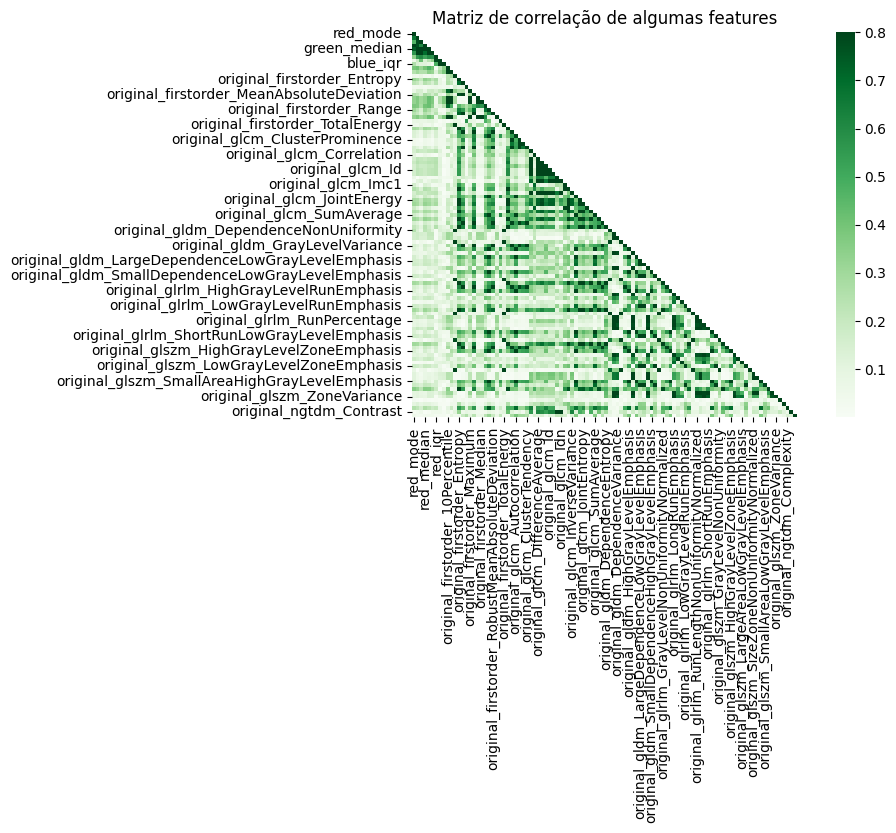

In [5]:
# Let's build a correlation matrix

# get the matrix from de dataframe using the corr() method. We'll get only positive numbers
corr_matrix = abs(features.corr())

# build mask to apply in seaborn heatmap
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

# declare plot and set figure size
fig0,ax0 = plt.subplots()
fig0.set_size_inches(10,5)

# set the title for the plot
ax0.set_title('Matriz de correlação de algumas features')

# create the heatmap for the correlation matrix
hm = sns.heatmap(corr_matrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=False)

# save the heatmap in the plots folder. bbox_inches='tight' insures that the figure is not cropped
fig0.savefig('../plots/correlation_mat.png',bbox_inches='tight')

/tmp/ipykernel_33531/157275826.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['red_mode'], color='r', bins=10);


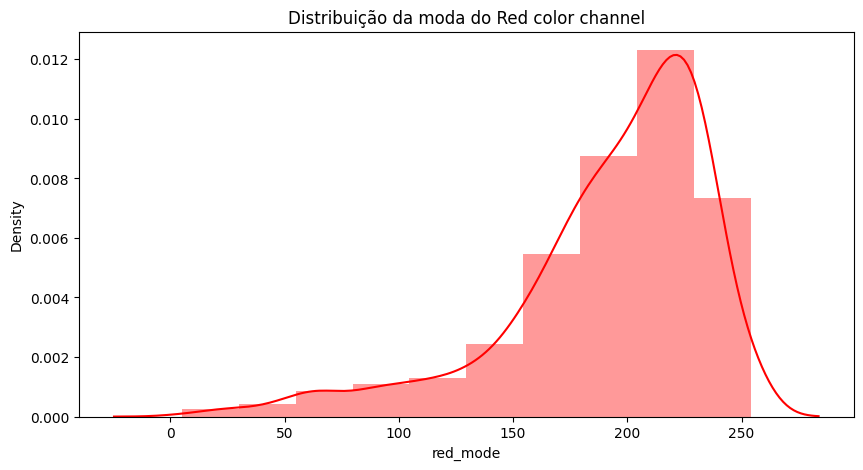

In [6]:
# plot the distribution of a color feature. In this case, lets plot the Red channel mode

fig1 ,ax1 = plt.subplots()
fig1.set_size_inches(10,5)
ax1.set_title('Distribuição da moda do Red color channel')
sns.distplot(features['red_mode'], color='r', bins=10);
fig1.savefig('../plots/red_mode_dist.png',bbox_inches='tight')

/tmp/ipykernel_33531/3171152226.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features['original_glcm_JointEnergy'], color='b', bins=10);


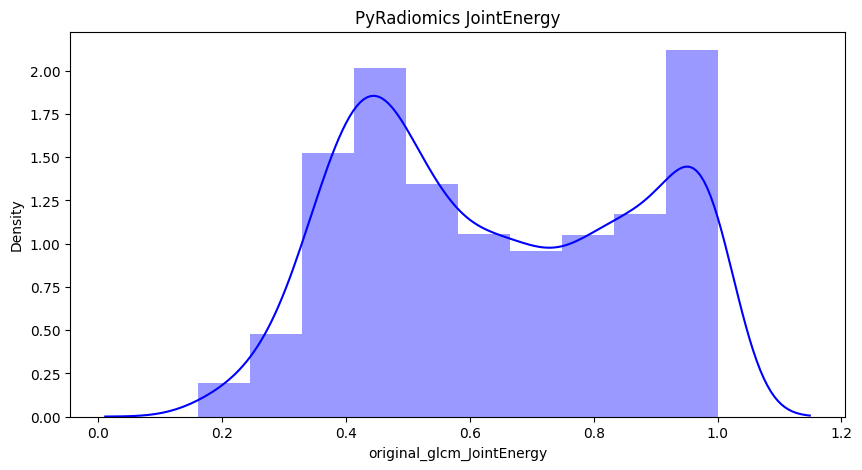

In [7]:
# plot the distribution of a pyradiomics feature. In this case, lets plot the Joint Energy
fig2 ,ax2 = plt.subplots()
fig2.set_size_inches(10,5)
ax2.set_title('PyRadiomics JointEnergy')
sns.distplot(features['original_glcm_JointEnergy'], color='b', bins=10);
fig2.savefig('../plots/joint_energy_dist.png',bbox_inches='tight')

joint energy=∑i=1Ng∑j=1Ng(p(i,j))2

Energy is a measure of homogeneous patterns in the image. A greater Energy implies that there are more instances of intensity value pairs in the image that neighbor each other at higher frequencies.


TypeError: cannot unpack non-iterable AxesSubplot object

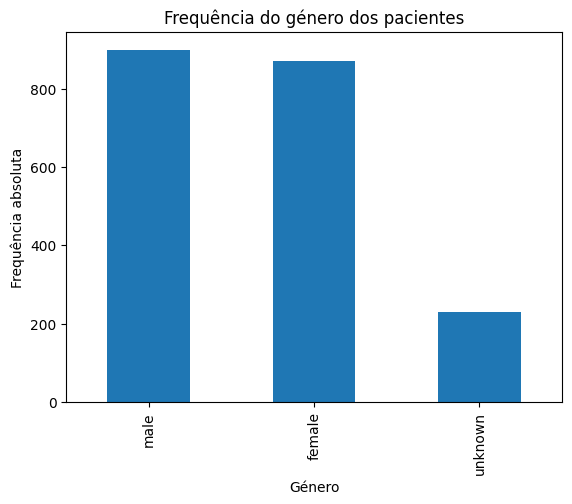

In [9]:
# Bar plot for the sex column
features['sex'].value_counts().plot(kind='bar', title='Frequência do género dos pacientes', xlabel='Género', ylabel='Frequência absoluta');
fig.savefig('../plots/patient_sex_barplot.png',bbox_inches='tight')